<img src='img/fastcamp_h.png' height=100% width=100%>

# 11강. Classification, Detection And Segmentation

# 이번장에서 배우는 것들
 * CNN으로 처리하려는 문제들
  * classification
  * localization
  * object detection
  * segmentation
 

# Image classification

* 주어진 사진에 미리 tagging된 객체들이 등장했는지를 학습하여 평가하는 문제
* 과거의 경우 객체의 특징을 vector로 변환하는 기준을 domain-knowledge가 풍부한 전문가에게 맡기는 수밖에 없었음
* 딥러닝은 vector embedding 자체를 모델 스스로 만들어내기 때문에 domain-knowledge가 적어짐

<img src='img/07_02.png'>

# Image classification

* 주어진 사진에 미리 tagging된 객체들이 등장했는지를 학습하여 평가하는 문제
* 과거의 경우 객체의 특징을 vector로 변환하는 기준을 domain-knowledge가 풍부한 전문가에게 맡기는 수밖에 없었음
* 딥러닝은 vector embedding 자체를 모델 스스로 만들어내기 때문에 domain-knowledge가 적어짐
* 최종적으로 출력되는 결과는 정의된 class의 개수를 갖는 1차원 벡터가 됨

<center><img src='img/11_01.png' height=100% width=100%></center>

# Image localization

* localization은 사진에 등장하는 하나의 객체가 존재하는 영역(bounding box)에 관심이 있음
* 주어진 사진에 대상 객체가 존재하는 bounding box위치를 맞추는 문제
* 아주 잠깐 학계에 등장했다가 object detection문제와 결합하여 사라짐

<center><img src='img/11_02.png'  height=100% width=100%></center>

### bounding box

* bounding box는 네변이 이미지상에서 축 기준으로 수평, 수직으로 이루어짐
* 주어진 이미지에 bbox를 그릴때 필요한 숫자는 몇개일까?
 * 2차원이미지에서 점을 찍으려면 x, y의 숫자가 2개 필요함
 * bbbox는 axis-align한 사각형이기 때문에 다시 점이 2개 필요함
 * 총 x1,y1 = point1, x2,y2 = point2로 4개의 숫자가 필요함
<img src='img/11_03.png' height=50% width=50%>

### localization의 구조

* 모든것을 classificaion의 구조와 동일하게 가져갈 수 있음
* 단지, 최종 ouput이 class를 이루는 vector가 아니고 x1, y1, x2, y2를 예측하는 vector로 변경됨
* 단, 이경우 x, y 좌표의 스케일이 너무 크기 때문에 예측을 못할 문제가 있어 좌표에 대한 0-1 normalize를 취함
 * 보통 가로 축 대비 x의 위치, 세로 축 대비 y의 위치로 0~1 normalize를 취하거나 비슷한 방식으로 정규화함
<center><img src='img/11_04.png' height=100% width=100%></center>

### bbox의 정확도 평가 방법

* IOU(intersection over union)라는 공식을 활용
* 주어진 정답 bbox를 $B_{gt}$, 모델이 예측한 bbox를 $B_{p}$라고 두면 IOU는 다음과 같다

$$ IOU(B_{gt}, B_{p}) = \frac{B_{gt} \cap B_{p}}{B_{gt} \cup B_{p}} \nonumber $$

<center><img src='img/11_06.png' height=100% width=100%></center>

# object detection

* single classification 및 localization 문제는 deep learning의 성능 증가 속도 대비 쉬운 문제군으로 분류되었음
* ojbect detection이라는 여러개의 객체에 대해서 classification하고 localization하는 문제인 ojbect detection이 등장

<center><img src='img/11_07.png' height=100% width=100%></center>

# object detection의 처리 

* ojbect detection은 어떻게 처리 될 수 있을까?
* 어떻게 하면 하나의 network에서 가변적인 객체의 수를 찾아낼 수 있을까?

### sliding window 방식
 * classification, localization을 처리할 수 있는 모델을 만들어두고
 * 주어진 사진을 일정한 크기의 사이즈로 crop하면서 stride하여 모델에 집어 넣고 결과를 집약하는 방식
 * 비효율적인 처리 방식, 하지만 직관적
 * 연산 비용이 높음
 * 하지만 싱글모델의 정확률이 높다면 결과 정확률도 정확률은 높음
 
<center><img src='img/11_01.gif' height=30% width=30%></center>

# single shot 방식
* region proposal 방식의 일종
  * region proposal 방식은 deep learning network에서 가능성 있는 영역을 제안해 주는 방식
  * 현재는 sliding window보다 훨씬 더 많이 연구 되고 있음
 
* single shot 방식은 주어진 사진 영역을 일정 사이즈의 grid로 나눠 그안에 우리가 관심이 있는 영역이 있는지 맞춤
* single shout 방식은 다른 proposal 방식보다 사람이 이해하기 쉽고 빠르다는 장점이 있음
* 단점은 다른 region proposal 방식 대비 살짝 정확도가 떨어짐

<center><img src='img/11_08.png' height=100% width=100%></center>

### object detection의 구조

* 간단하고 이해하기 직관적이면서 빠른 yolo 구조로 설명
* 현재 yolo version 3까지 나오면서 괜찮은 ojbect detection모델을 유지 중
* yolo는 cnn에서 feature map (latent vector)를 얻은 뒤 해당 vector를 7x7x(classes 확율 vector + bbox point2개 + 각 bbox가 유효한 확율인지 vector)로 변형시킴

<center><img src='img/11_09.png' height=100% width=100%></center>

<center><img src='img/11_10.png' height=100% width=100%></center>

* 시각적으로 보면 yolo는 한장의 사진을 가로 7칸, 새로 7칸의 작은 49개의 사진으로 바꾼 뒤
* 그 영역에서 내가 원하는 클래스가 있는지를 확률로 나타내고
* 확률이 일정이상이라면 bbox 2개를 이용하여 x1,x2,y1,y2를 2개 예측함
* 총 92개의 객체를 찾아낼 수 있지만, 같은 객체에 대해서 여러개를 찾을 수 있기 때문에 nms 알고리즘을 통해 결합함

### NMS (non-maximum-suppression)
* 객체가 탐지한 영역에서 iou가 어느정도 일정한 비율이상 겹치면 하나로 묶어주는 알고리즘
* 묶는 방법은 여러가지가 있을 수 있지만 보통 확률이 가장 높은 bbox의 경계를 우선함
<center><img src='img/11_11.png' height=60% width=60%></center>

# segmentation

* segmentation은 2갈래로 나누어짐
* 같은 class를 가지고 있는 여러 객체들은 묶어 1개의 값으로 나타내는 semantic segmentation과
* 같은 class를 가지고 있어도 여러 객체들은 각각 다른 값으로 나타내는 instance segmentation이 있음

<center><img src='img/11_12.png' height=100% width=100%></center>

# segmentation의 구조

* 의외로 segmentation은 detection보다 쉬운 구조를 가지고 있음
* detection이 class와 bbox를 동시에 예측하는 문제
* 때문에 일반적인 model은 regreesion과 classification을 같이 사용함
* 그러나 segmentation의 경우 100% classification문제라고 볼 수 있음

<center><img src='img/11_15.png' height=100% width=100%></center>

### sementic segmentation의 출력

* 각 출력은 의미하는 class (semantic class) 당 고유한 숫자를 붙임
* classificaion에서 각 class를 dimension 당 고유한 숫자를 붙인것과 동일
<center><img src='img/11_13.png' height=100% width=100%></center>

### one-hot encoding

* 풀어야할 객체가 많아지면 segmentation의 스케일이 계속 커지게 됨
* 출력을 one-hot encoding을 통해서 차원의 확률값으로 변경

<center><img src='img/11_14.png' height=100% width=100%></center>

# The Oxford-IIIT Pet Dataset

* https://www.robots.ox.ac.uk/~vgg/data/pets/
* 37종의 개와 고양이 사진들의 모음
* 각 종은 약 200장의 사진들이 주어져 있음
* 용량이 크기 때문에 현강의에서는 224 사이즈로 줄이고 화질도 약간 낮춘 데이터로 실습
* annotation
    * 머리 위치 bbox 태깅
    * 이미지 각 픽셀 단위의 존재 여부 태깅
    
<center><img src='img/11_05.png' height=100% width=100%></center>

In [7]:
# vgg16 스타일의 개, 고양이 검출기
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, ReLU, BatchNormalization, Dropout, GlobalAvgPool2D, Dense
from keras.models import Model

def vgg16_cls():
    inputs = Input(shape=(224, 224, 3))
    x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = MaxPool2D(2, 2)(x)
    
    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    x = MaxPool2D(2, 2)(x)
    
    x = Conv2D(256, 3, activation='relu', padding='same')(x)
    x = Conv2D(256, 3, activation='relu', padding='same')(x)
    x = Conv2D(256, 3, activation='relu', padding='same')(x)
    x = MaxPool2D(2, 2)(x)
    
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = MaxPool2D(2, 2)(x)
    
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = MaxPool2D(2, 2)(x)
    
    # fc
    x = GlobalAvgPool2D()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(2, activation='softmax')(x)
    return Model(inputs, x)
    
model = vgg16_cls()
model.compile(optimizer='adam', loss='mse')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [1]:
import imageio
import glob
import numpy as np
import random
from keras.utils import to_categorical
X = []
Y = []

images = glob.glob('data/oxford-pet/small/images/*.jpg')
random.shuffle(images)
for path in images:
    X.append(imageio.imread(path))    
    y = 0 # 0. cat, 1: dog
    if path.split('/')[-1][0].lower():
        y = 1
    y = to_categorical(y, 2)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

Using TensorFlow backend.


In [2]:
X.shape, Y.shape

((1129, 224, 224, 3), (1129, 2))

In [3]:
test = int(len(X) * 0.1)
train_x = X[:-test]
train_y = Y[:-test]
test_x = X[-test:]
test_y = Y[-test:]

len(train_x), len(train_y), len(test_x), len(test_y),

(1017, 1017, 112, 112)

In [6]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=15, batch_size=1)

Instructions for updating:
Use tf.cast instead.
Train on 1017 samples, validate on 113 samples
Epoch 1/15
1017/1017 [==============================] - 103s 101ms/step - loss: 2.6781e-04 - val_loss: 0.0000e+00
Epoch 2/15
1017/1017 [==============================] - 98s 96ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15
1017/1017 [==============================] - 98s 96ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/15
  31/1017 [..............................] - ETA: 1:32 - loss: 0.0000e+00

KeyboardInterrupt: 

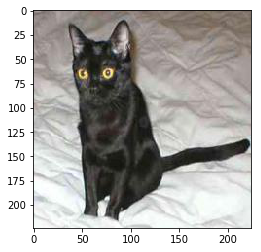

[0. 1.]


In [5]:
import matplotlib.pylab as plt
plt.imshow(test_x[0])
plt.show()
print(test_y[0])

In [12]:
idx = 0
print( model.predict(np.expand_dims(test_x[idx], axis=0)) , test_y[idx])
idx = 1
print( model.predict(np.expand_dims(test_x[idx], axis=0)) , test_y[idx])
idx = 100
print( model.predict(np.expand_dims(test_x[idx], axis=0)) , test_y[idx])

[[0. 1.]] [0. 1.]
[[0. 1.]] [0. 1.]
[[0. 1.]] [0. 1.]


In [14]:
model.save_weights('weights/catdog_cls.h5')

In [8]:
from keras.layers import BatchNormalization, Activation
from keras.losses import binary_crossentropy
from keras.optimizers import SGD
import keras.backend as K

def vgg16_bbox():
    inputs = Input(shape=(224, 224, 3))
    x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = MaxPool2D(2, 2)(x)
    
    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    x = MaxPool2D(2, 2)(x)
    
    x = Conv2D(256, 3, activation='relu', padding='same')(x)
    x = Conv2D(256, 3, activation='relu', padding='same')(x)
    x = Conv2D(256, 3, activation='relu', padding='same')(x)
    x = MaxPool2D(2, 2)(x)
    
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = MaxPool2D(2, 2)(x)
    
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = MaxPool2D(2, 2)(x)
    
    # fc
    x = GlobalAvgPool2D()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Activation('tanh')(x)
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Activation('tanh')(x)
    
    x = Dense(4, activation='tanh')(x)
    model = Model(inputs, x)
    return model

def loss(y_true, y_pred):
    return K.abs(y_true - y_pred)

model = vgg16_bbox()
#model.compile(optimizer=SGD(0.01, momentum=0.9, nesterov=True), loss=loss)
model.compile(optimizer='adam', loss=loss)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
__________

In [9]:
Y = []
for path in images:
    path = path.replace('images', 'annotations').replace('.jpg', '.npy')
    bbox = np.load(path)
    Y.append(bbox)
Y = np.array(Y)
train_y = Y[:-test]
test_y = Y[-test:]


In [10]:
train_x.shape, train_y.shape

((1017, 224, 224, 3), (1017, 4))

In [11]:
idx =2
train_y[idx], (train_y[idx] * 224).astype(np.int32)

(array([0.56756757, 0.26      , 0.80780781, 0.424     ]),
 array([127,  58, 180,  94]))

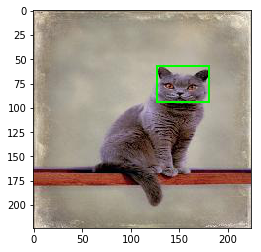

In [12]:
from imgaug.augmentables.bbs import BoundingBox
bbox = BoundingBox(*(train_y[idx] * 224).astype(np.int32))
plt.imshow(  bbox.draw_on_image(train_x[idx], size=2) )
plt.show()

In [100]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=15, batch_size=1)

Train on 1017 samples, validate on 112 samples
Epoch 1/15
1017/1017 [==============================] - 104s 103ms/step - loss: 0.1328 - val_loss: 0.6333
Epoch 2/15
1017/1017 [==============================] - 102s 100ms/step - loss: 0.1283 - val_loss: 0.7361
Epoch 3/15
1017/1017 [==============================] - 102s 100ms/step - loss: 0.1287 - val_loss: 0.5330
Epoch 4/15
1017/1017 [==============================] - 103s 101ms/step - loss: 0.1269 - val_loss: 0.6068
Epoch 5/15
1017/1017 [==============================] - 103s 101ms/step - loss: 0.1263 - val_loss: 0.4112
Epoch 6/15
1017/1017 [==============================] - 102s 101ms/step - loss: 0.1270 - val_loss: 0.4863
Epoch 7/15
1017/1017 [==============================] - 102s 100ms/step - loss: 0.1263 - val_loss: 0.6384
Epoch 8/15
  32/1017 [..............................] - ETA: 1:37 - loss: 0.125

KeyboardInterrupt: 

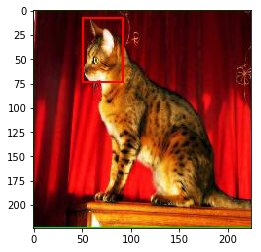

[  0.        0.      224.      223.99936]


In [23]:
from imgaug.augmentables.bbs import BoundingBox
idx = 8
pred = model.predict(np.expand_dims(train_x[idx], axis=0))
bbox = BoundingBox(*(pred[0] * 224).astype(np.int32), label='pred')
a = bbox.draw_on_image(train_x[idx], size=3, color=(0,225,0))

bbox = BoundingBox(*(train_y[idx] * 224).astype(np.int32), )
b = bbox.draw_on_image(a, size=2, color=(255,0,0))
plt.imshow(  b )
plt.show()
print(pred[0] * 224)

In [14]:
from keras.layers import BatchNormalization, Activation, LeakyReLU
from keras.losses import binary_crossentropy
from keras.optimizers import SGD
import keras.backend as K

def darknet():
    
    def block(x, filter_size, kernel_size, strides=1):
        x = Conv2D(filter_size, kernel_size, strides=strides, padding='same')(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        return x
                  
    inputs = Input(shape=(224, 224, 3))
    x = block(inputs, 32, 3)
    x = MaxPool2D(2, 2)(x)
    
    x = block(x, 64, 3)
    x = MaxPool2D(2, 2)(x)
    
    x = block(x, 128, 3)
    x = block(x, 64, 1)
    x = block(x, 128, 3)
    x = MaxPool2D(2, 2)(x)
    
    x = block(x, 256, 3)
    x = block(x, 128, 1)
    x = block(x, 256, 3)
    x = MaxPool2D(2, 2)(x)
    
    x = block(x, 512, 3)
    x = block(x, 256, 1)
    x = block(x, 512, 3)
    x = block(x, 256, 1)
    x = block(x, 512, 3)
    
    x = block(x, 1000, 3)
    x = GlobalAvgPool2D()(x)
    x = Dense(4, activation='sigmoid')(x)
    model = Model(inputs, x)
    return model

def loss(y_true, y_pred):
    return K.abs(y_true - y_pred)

model = darknet()
#model.compile(optimizer=SGD(0.01, momentum=0.9, nesterov=True), loss=loss)
model.compile(optimizer='adam', loss='mae')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 112, 112, 64)      256       
__________

In [15]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=15, batch_size=1)

Instructions for updating:
Use tf.cast instead.
Train on 1017 samples, validate on 112 samples
Epoch 1/15
1017/1017 [==============================] - 64s 63ms/step - loss: 0.1377 - val_loss: 0.1847
Epoch 2/15
1017/1017 [==============================] - 61s 60ms/step - loss: 0.1336 - val_loss: 0.2122
Epoch 3/15
1017/1017 [==============================] - 61s 60ms/step - loss: 0.1313 - val_loss: 0.2190
Epoch 4/15
1017/1017 [==============================] - 61s 60ms/step - loss: 0.1302 - val_loss: 0.2308
Epoch 5/15
1017/1017 [==============================] - 61s 60ms/step - loss: 0.1291 - val_loss: 0.2180
Epoch 6/15
1017/1017 [==============================] - 61s 60ms/step - loss: 0.1284 - val_loss: 0.2660
Epoch 7/15
1017/1017 [==============================] - 61s 60ms/step - loss: 0.1280 - val_loss: 0.2473
Epoch 8/15
1017/1017 [==============================] - 61s 60ms/step - loss: 0.1268 - val_loss: 0.2421
Epoch 9/15
1017/1017 [==============================] - 61s 60ms/step - l

In [41]:
import xml.etree.ElementTree as ET




for path in glob.glob('data\\oxford-pet\\small\\annotations\\*.npy'):
    bbox = np.load(path).astype(np.float32)
    
    xml_path = path.replace('\\small\\annotations\\', '\\annotations\\xmls\\').replace('.npy', '.xml')
    tree =  ET.parse(xml_path).getroot()
    size = tree.find("size")
    width = float(size.find('width').text)
    height = float(size.find('height').text)
    
    bbox = np.load(path).astype(np.float32)
    
    x1= bbox[0]/width
    y1= bbox[1]/height
    
    x2= bbox[2]/width
    y2= bbox[3]/height
    
    bbox = np.array([x1, y1, x2, y2])
    np.save(path, bbox)
    

In [42]:
print(bbox)

[0.18666667 0.05666667 0.46222222 0.28333333]


In [133]:
from keras import models
from keras.applications import VGG16
 
 
pre_model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 12s 0us/step
